# Problem Set 4
## MACS 30250  Dr. Evans
### Yongfei Lu

## Exercise 2.1

In [14]:
# import packages
import numpy as np
import pandas as pd
import scipy.optimize as opt
from matplotlib import pyplot as plt
import time

In [57]:
# load the parameters from 2.6

A = 1 
alpha = 0.35 
beta = 0.442 
delta = 0.6415 
sigma = 3 
nvec = np.array([1.0, 1.0, 0.2])
f_params = (nvec, A, alpha, delta)

In [71]:
# define some ausiliary functions
get_r = lambda K, L, alpha, delta, A : A * alpha * ((L / K) ** (1 - alpha)) - delta
get_w = lambda K, L, alpha, A: A * (1 - alpha) * ((K / L) ** alpha)
get_K = lambda bvec: np.sum(bvec)
get_L = lambda nvec: np.sum(nvec)
get_Y = lambda K, L, alpha, A: A * (K ** alpha) * (L ** (1-alpha))


In [72]:
# define feasible function

def feasible(f_params, bvec_guess):
    
        nvec, A, alpha, delta = f_params
        b2, b3 = bvec_guess
        
        K = get_K(bvec_guess)
        L = get_L(nvec)
        w = get_w(K, L, alpha, A)
        r = get_r(K, L, alpha, delta, A)
        c1 = nvec[0] * w - bvec_guess[0]
        c2 = nvec[1] * w + (1 + r) * bvec_guess[0] - bvec_guess[1]
        c3 = nvec[2] * w + (1 + r) * bvec_guess[1]
        
        return (np.array([c1 <= 0 or c2 <= 0, c2 <= 0]), 
            np.array([c1 <= 0, c2 <= 0, c3 <= 0]), 
            np.array([K <= 0]))

## 2.1 (a)

In [73]:
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, np.array([1.0, 1.2]))
print('b_cnstr: {};\nc_cnstr: {};\nK_cnstr: {}.'.format(b_cnstr, c_cnstr, K_cnstr))

b_cnstr: [ True False];
c_cnstr: [ True False False];
K_cnstr: [False].


It turns out that the consumption nonnegativity constraint for period 1 is violated.

## 2.1 (b)

In [74]:
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, np.array([0.06, -0.001]))
print('b_cnstr: {};\nc_cnstr: {};\nK_cnstr: {}.'.format(b_cnstr, c_cnstr, K_cnstr))

b_cnstr: [False False];
c_cnstr: [False False False];
K_cnstr: [False].


It turns out that all of the constraints are satisfied.

## 2.1 (c)

In [75]:

b_cnstr, c_cnstr, K_cnstr = feasible(f_params, np.array([0.1, 0.1]))
print('b_cnstr: {};\nc_cnstr: {};\nK_cnstr: {}.'.format(b_cnstr, c_cnstr, K_cnstr))

b_cnstr: [False False];
c_cnstr: [False False False];
K_cnstr: [False].


It turns out that all of the constraints are satisfied.

## Exercise 2.2


In [78]:
# define 2 functions as required

def EulEq(bvec, args):
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = args
    K = get_K(bvec)
    L = get_L(nvec)
    w = get_w(K, L, alpha, A)
    r = get_r(K, L, alpha, delta, A)
    c1 = nvec[0] * w - bvec[0]
    c2 = nvec[1] * w + (1 + r) * bvec[0] - bvec[1]
    c3 = nvec[2] * w + (1 + r) * bvec[1]
    Eul1 = (c1 ** (-sigma)) - beta * (1 + r) * (c2 ** (-sigma)) 
    Eul2 = (c2 ** (-sigma)) - beta * (1 + r) * (c3 ** (-sigma))

    return np.array([Eul1, Eul2])


def get_SS(params, bvec_guess, SS_graphs):
    start_time = time.clock() 
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params
    b_ss = opt.root(EulEq, bvec_guess, args = np.array(params)).x
    K_ss = get_K(b_ss)
    #L_ss = get_L(nvec)
    w_ss = get_w(K_ss, L, alpha, A)
    #A * (1 - alpha) * ((K_ss / L) ** alpha)
    r_ss = get_r(K_ss, L, alpha, delta, A)
    #A * alpha * ((L / K_ss) ** (1 - alpha)) - delta
    Y_ss = get_Y(K_ss, L, alpha, A)
    #A * (K_ss ** alpha) * (L ** (1 - alpha))
    b2, b3 = b_ss
    c1 = nvec[0] * w_ss - b_ss[0]
    c2 = nvec[1] * w_ss + (1 + r_ss) * b_ss[0] - b_ss[1]
    c3 = nvec[2] * w_ss + (1 + r_ss) * b_ss[1]
    
    c_ss = np.array([c1, c2, c3])
    C_ss = np.sum(c_ss)
    Eul1 = (c_ss[0] ** (-sigma)) - beta * (1 + r_ss) * (c_ss[1] ** (-sigma)) 
    Eul2 = (c_ss[1] ** (-sigma)) - beta * (1 + r_ss) * (c_ss[2] ** (-sigma))
    
    EulErr_ss = np.array([Eul1, Eul2])
    RCerr_ss = Y_ss - C_ss - delta * K_ss
    ss_time = time.clock() - start_time 
    ss_output = {'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
                 'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss,
                 'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss,
                 'ss_time': ss_time}
    
    if SS_graphs:
        plt.plot(np.arange(1,4), c_ss, marker='o',label='consumptions')
        plt.plot(np.arange(2,4), b_ss, marker='o',label='savings')
        plt.xlabel('Agent Age')
        plt.ylabel('Agent Comsumption, Savings')
        plt.title('Steady-state Distribution of Consumptions and Savings by Age')
        plt.legend()
        plt.show()
    
    return ss_output

In [79]:
# (a)
SS_tol = 1e-10
params = (beta, sigma, nvec, np.sum(nvec), A, alpha, delta, SS_tol)
ss_output = get_SS(params, np.array([0.1, 0.1]), False)
ss_output

/Users/luyongfei/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/luyongfei/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


{'b_ss': array([0.01931253, 0.0584111 ]),
 'c_ss': array([0.18241213, 0.20961468, 0.24087387]),
 'w_ss': 0.20172465739052575,
 'r_ss': 2.433062339127069,
 'K_ss': 0.07772362575316386,
 'Y_ss': 0.6827603788602411,
 'C_ss': 0.6329006729395864,
 'EulErr_ss': array([-1.39266376e-12,  2.62900812e-12]),
 'RCerr_ss': 8.326672684688674e-17,
 'ss_time': 0.0006370000000011089}

/Users/luyongfei/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/luyongfei/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


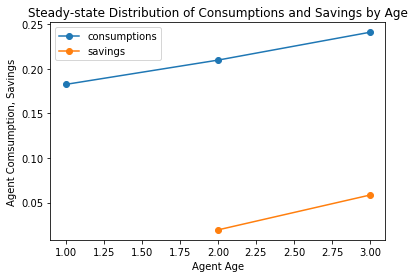

{'b_ss': array([0.01931253, 0.0584111 ]),
 'c_ss': array([0.18241213, 0.20961468, 0.24087387]),
 'w_ss': 0.20172465739052575,
 'r_ss': 2.433062339127069,
 'K_ss': 0.07772362575316386,
 'Y_ss': 0.6827603788602411,
 'C_ss': 0.6329006729395864,
 'EulErr_ss': array([-1.39266376e-12,  2.62900812e-12]),
 'RCerr_ss': 8.326672684688674e-17,
 'ss_time': 0.001154999999998907}

In [80]:
# (b)
get_SS(params, np.array([0.1, 0.1]), True)

/Users/luyongfei/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/luyongfei/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


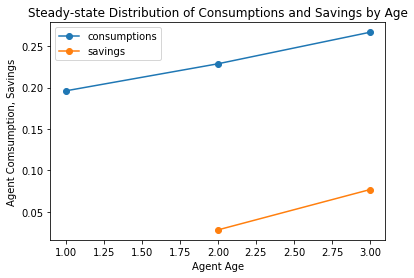

{'b_ss': array([0.02817692, 0.07686545]),
 'c_ss': array([0.19597528, 0.22861594, 0.26669307]),
 'w_ss': 0.22415219593446706,
 'r_ss': 1.8863765057189819,
 'K_ss': 0.1050423702259807,
 'Y_ss': 0.7586689708551193,
 'C_ss': 0.6912842903551526,
 'EulErr_ss': array([6.87805368e-12, 2.52953214e-12]),
 'RCerr_ss': 9.71445146547012e-17,
 'ss_time': 0.0005569999999988084}

In [81]:
# (c)
params_c = (0.55, sigma, nvec, np.sum(nvec), A, alpha, delta, SS_tol)
ss_output2 = get_SS(params_c, np.array([0.1, 0.1]), True)
ss_output2

When $\beta$ increases, all households become more patient, then the steady-state values of wage, consumptions and savings will all increase, except that the interest rate will decrease. 

The intuition is that higher $\beta$ will cause the comsumers to value future more than the present, which leads to more savings. Higher savings will decrease interest rate and increase firm capitals, which will then increase marginal productivity of labor and wages. This will eventually stimulate consumption.

## Exercise 2.3

In [82]:
# define auxiliary functions
get_cons = lambda b_s, b_s_1, n_s, r, w: w * n_s + (1 + r) * b_s - b_s_1
get_util = lambda c, sigma=3: (c ** (1-sigma))/(1-sigma)
get_MU = lambda c, sigma=3: c ** (-sigma)


In [83]:
# define the required functions
def timepath(K_path_update, K_init, K_ss, T, A, alpha, delta, nvec, m, Type):
    path = np.zeros([T + m, 4])
    period_path  = np.arange(1, T + m +1)
    if Type == "linear":
        K_path = np.linspace(K_init, K_ss, num = T)
    if Type == "update":
        K_path = K_path_update
    path[: , 0] = period_path
    path[: -m, 1] = K_path
    path[-m: , 1] = K_ss
    path[: , 2] = get_w(path[: , 1], nvec.sum(), alpha, A)
    path[: , 3] = get_r(path[: , 1], nvec.sum(), alpha, delta, A)
    return path

def solve_path(path, *args):
    bvec_init_val, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss = args
    b_mat = np.zeros([T + m, 3])
    b_mat[0, 0:-1] = bvec_init_val
    def get_b32(b32, *args):
        r2, r3, b21, w2, w3, beta, sigma, nvec = args
        c2  = get_cons(b21, b32, nvec[1], r2, w2)
        c3  = get_cons(b32, 0, nvec[2], r3, w3)
        MU2 = get_MU(c2)
        MU3 = get_MU(c3)
        error =  MU2 - beta * (1 + r3) * MU3
        return error
    b32_init = 0.1
    b32_args  = (path[0 , 3], path[1 , 3], b_mat[0 , 0], path[0 , 2], path[1 , 2], beta, sigma, nvec)
    b32 = opt.root(get_b32, b32_init, args = (b32_args))
    b32 = b32.x
    b_mat[1 , 1] = b32
    for i in range(path.shape[0]-2):
        w1 = path[i - 1 , 2]
        w2 = path[i , 2]
        w3 = path[i + 1 , 2]
        r2 = path[i , 3]
        r3 = path[i + 1, 3]
        ts_args = (w1, w2, w3, r2, r3, beta, alpha, delta, sigma, A, nvec)
        bvec_ts = opt.root(EulErr, bvec_init, args = (ts_args))
        b_mat[i , 0] = bvec_ts.x[0]
        b_mat[i + 1, 1] = bvec_ts.x[1]
    b_mat[: , 2] = b_mat[: , 0] + b_mat[: , 1]
    return b_mat

def EulErr(bvec, *args):
    w1, w2, w3, r2, r3, beta, alpha, delta, sigma, A, nvec = args
    b2, b3 = bvec
    L = nvec.sum()
    K = get_K(bvec)
    c1 = get_cons(0, b2, nvec[0], r2, w1)
    c2 = get_cons(b2, b3, nvec[1], r2, w2)
    c3 = get_cons(b3, 0, nvec[2], r3, w3)
    MU1 = get_MU(c1)
    MU2 = get_MU(c2)
    MU3 = get_MU(c3)
    Eul1 = MU1 - beta*(1+r2) * MU2
    Eul2 = MU2 - beta*(1+r3) * MU3
    Euler_errs = np.array([Eul1, Eul2])
    return Euler_errs



In [84]:
def TPI(path_init, xival, tol, *args):
    bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss, K_ss = args
    b_mat = np.zeros([T + m, 3])
    b_mat[0, 0:-1] = bvec_init
    b_HH_init  = solve_path(path_init, bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss)
    diff_init = sum(((path_init[: -m, 1] - b_HH_init[: -m, 2])/path_init[: -m, 1])**2)
    if diff_init > tol:
        path = path_init
        b_HH = b_HH_init
        diff = diff_init
        iter_num = 0
        while diff > tol:
            update = xival * b_HH[: -m, 2] + (1 - xival) * path[: -m, 1]
            path = timepath(update, 0, K_ss, T, A, alpha, delta, nvec, m, "update")
            b_HH = solve_path(path, bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss)
            diff = sum(((path[: -m, 1] - b_HH[: -m, 2])/path[: -m, 1])**2)
            iter_num = iter_num + 1
            print("iteration: ", iter_num, "  difference: ", diff)

        result = (path, b_HH)
    else:
        result =  (path_init, b_HH_init)
    return result

## 2.3 (a)

In [85]:

# set the parameters
xival = 0.1
tol = 1e-9
ss_output = get_SS(params, np.array([0.1, 0.1]), False)
bvec_init = np.array([0.8 * ss_output['b_ss'][0], 1.1 * ss_output['b_ss'][1]])
T = 30
m = 25
bvec_ss = ss_output['b_ss']
K_ss = ss_output['K_ss']
K_init = bvec_init.sum()

path_init = timepath(0, K_init, K_ss, T, A, alpha, delta, nvec, m, "linear")

/Users/luyongfei/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/luyongfei/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [86]:
path = TPI(path_init, xival, tol,  bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss, K_ss)


iteration:  1   difference:  0.0029786998830727746
iteration:  2   difference:  0.0024123019609066415
iteration:  3   difference:  0.001967493702330656
iteration:  4   difference:  0.001615973544184616
iteration:  5   difference:  0.0013363655473669321
iteration:  6   difference:  0.0011124679958151322
iteration:  7   difference:  0.0009319565014451312
iteration:  8   difference:  0.0007854206680523601
iteration:  9   difference:  0.0006656464722004509
iteration:  10   difference:  0.000567080252523225
iteration:  11   difference:  0.0004854273224365549
iteration:  12   difference:  0.0004173506457818963
iteration:  13   difference:  0.0003602440707093479
iteration:  14   difference:  0.0003120612471535515
iteration:  15   difference:  0.00027118622327650403
iteration:  16   difference:  0.00023633530554070995
iteration:  17   difference:  0.00020648241964873082
iteration:  18   difference:  0.0001808021748516401
iteration:  19   difference:  0.0001586262934732381
iteration:  20   diff

In [87]:
K_path = path[0][:, [0 , 1]]
w_path = path[0][:, [0 , 2]]
r_path = path[0][:, [0 , 3]]
b_path = path[1][:,:2]

Eulerr_path = np.zeros((30, 2))
RCerr_path = np.zeros(30)
for i in range(30):
    if i == 0:
        rt = rt1 = r_path[0,1]
        wt = wt1 = w_path[0,1]
        b2t = b2t1 = b_path[0, 0]
        b3t = b3t1 = b_path[0, 1]
    else:
        rt, rt1 = r_path[i, 1], r_path[i-1, 1]
        b2t, b3t = b_path[i,:]
        b2t1, b3t1 = b_path[i-1, :]
        wt, wt1 = w_path[i,1], w_path[i-1, 1]
    Kt = K_path[i,1]
    Kt_1 = K_path[i+1, 1]
    Yt = get_Y(Kt, nvec.sum(), alpha, A)
    c1t = get_cons(0, b2t, nvec[0], rt, wt)
    c2t = get_cons(b2t1, b3t, nvec[1], rt1, wt)
    c3t = get_cons(b3t1, 0, nvec[2], rt1, wt)
    Ct = c1t + c2t + c3t
    RCerr_path[i] = Yt - Ct - Kt_1 + (1 - delta) * Kt
    Eulerr_path[i, :] = EulErr(b_path[i, :], w_path[i,1], w_path[i+1,1], 
                               w_path[i+2,1], r_path[i+1,1], r_path[i+2,1], 
                               beta, alpha, delta, sigma, A, nvec)

In [88]:
print('Maximum of the absolute values of all the Euler errors across the entire time path:', np.abs(Eulerr_path).max())
print('Maximum of the absolute values of all the resource constraint errors across the entire time path:', np.abs(RCerr_path).max())


Maximum of the absolute values of all the Euler errors across the entire time path: 37.403922436717025
Maximum of the absolute values of all the resource constraint errors across the entire time path: 0.00577342786005447


## 2.3 (b)

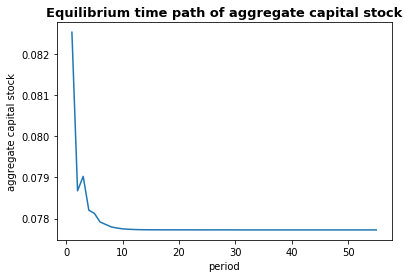

In [89]:
K_fig = plt.figure()
plt.plot(K_path[: , 0], K_path[: , 1])
plt.xlabel('period')
plt.ylabel('aggregate capital stock')
plt.title('Equilibrium time path of aggregate capital stock', fontsize=13, fontweight='bold')
plt.show()

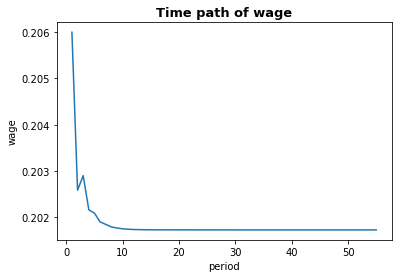

In [90]:
w_fig = plt.figure()
plt.plot(w_path[: , 0], w_path[: , 1])
plt.xlabel('period')
plt.ylabel('wage')
plt.title('Time path of wage',fontsize=13, fontweight='bold')
plt.show()

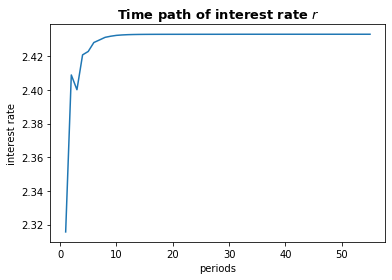

In [91]:
r_fig = plt.figure()
plt.plot(r_path[: , 0], r_path[: , 1])
plt.xlabel('periods')
plt.ylabel('interest rate')
plt.title('Time path of interest rate $r$', fontsize=13, fontweight='bold')
plt.show()

## 2.3 (c)

In [92]:
for i in range(50):
    K = K_path[i, 1]
    if abs(K - K_ss) <= 1e-05:
        print('It takes {} periods to gei within 0.00001 of the steady-state aggregate capital stock.'.format(int(K_path[i, 0])))
        break

It takes 12 periods to gei within 0.00001 of the steady-state aggregate capital stock.


In [93]:
for i in range(50):
    K_mat = K_path[i:, 1]
    Diff = np.abs(K_mat - K_ss)
    if np.sum(Diff > 1e-05) == 0:
        print(" After period {}, the aggregate capital stock is never again farther than 0.00001 away from the steady-state.".format(int(K_path[i, 0])))
        break

 After period 12, the aggregate capital stock is never again farther than 0.00001 away from the steady-state.
